# Name : Jay Rambhiya

# Git-Hub Username : jay-rambhiya

# USC ID: #2219880371

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
import math
from tabulate import tabulate
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# (1) (b) Exploring the data

# i. Rows and Columns in the dataset

In [2]:
df = pd.read_excel('../Data/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# The dataset contains 9568 Rows which represent data collected from a Combined Cycle Power Plant over 6 years (2006-2011). There are 5 Columns which represent features like hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) and net hourly electrical energy output (EP)  of the plant.

# Pairwise scatterplots of all the variables

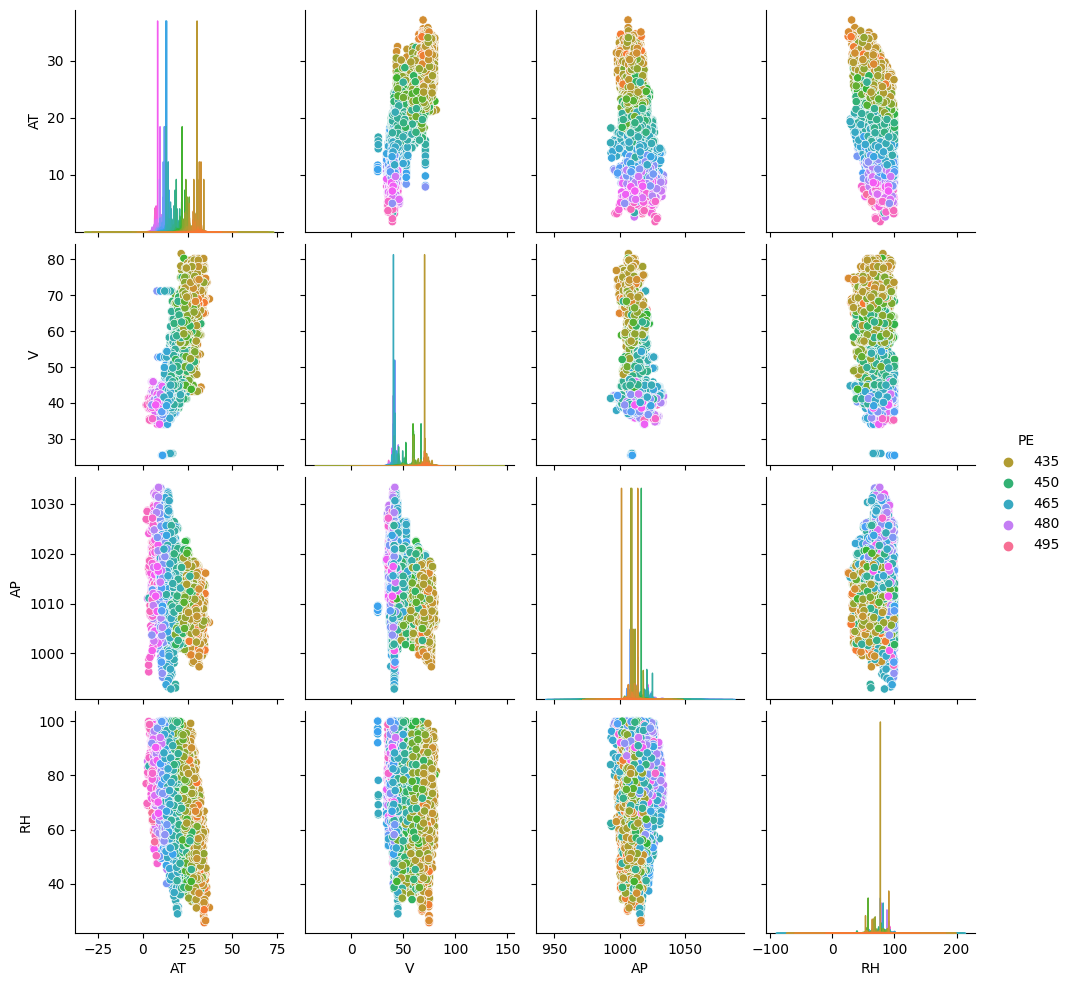

In [3]:
sns.pairplot(df, hue = 'PE', palette='husl')

# From the above pair plot , we can see that PE value of the plant is low if the AT is low and vise versa. Also PE value of plant is low if V is low and vise versa. Nothing can be said for the remaining 2 features.

# iii. Dataset Summary

In [4]:
df1 = df.describe()
df1.loc['range'] = df1.loc['max'] - df1.loc['min']
df1.loc['interquartileRange'] = df1.loc['75%'] - df1.loc['25%']
df1.loc['median'] = df1.loc['50%']
df1.loc['firstquartile'] = df1.loc['25%']
df1.loc['thirdquartile'] = df1.loc['75%']
df1 = df1.loc[['mean', 'median', 'range', 'firstquartile', 'thirdquartile', 'interquartileRange'], :]
df1

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
firstquartile,13.510000,41.740000,1009.100000,63.327500,439.750000
thirdquartile,25.720000,66.540000,1017.260000,84.830000,468.430000
interquartileRange,12.210000,24.800000,8.160000,21.502500,28.680000


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
table = tabulate(df1, headers = df1.head(0), tablefmt = "fancy_grid")
print(table)

╒════════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│                    │      AT │       V │      AP │      RH │      PE │
╞════════════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ mean               │ 19.6512 │ 54.3058 │ 1013.26 │ 73.309  │ 454.365 │
├────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ median             │ 20.345  │ 52.08   │ 1012.94 │ 74.975  │ 451.55  │
├────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ range              │ 35.3    │ 56.2    │   40.41 │ 74.6    │  75.5   │
├────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ firstquartile      │ 13.51   │ 41.74   │ 1009.1  │ 63.3275 │ 439.75  │
├────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ thirdquartile      │ 25.72   │ 66.54   │ 1017.26 │ 84.83   │ 468.43  │
├────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ interquartileRange │ 12.21   │ 24.8    │    8.16 

# (1) (c) Simple Linear Regression Models

# Simple Linear Regression Model using AT

In [7]:
model = smf.ols('PE~AT', df)
linRegModelAT=model.fit()
predictionAT = linRegModelAT.predict(df)
linRegModelAT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:55   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

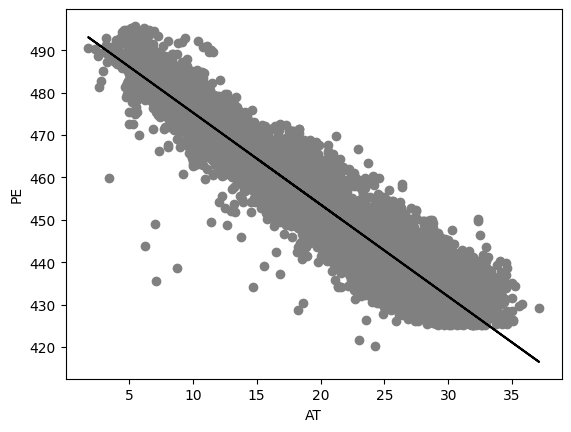

In [8]:
plt.scatter(df['AT'], df['PE'], color = 'grey')
plt.ylabel('PE')
plt.xlabel('AT')
plt.plot(df['AT'], predictionAT, color = 'black')

# Simple Linear Regression Model using V

In [9]:
model = smf.ols('PE~V', df)
linRegModelV=model.fit()
predictionV = linRegModelV.predict(df)
linRegModelV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:55   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

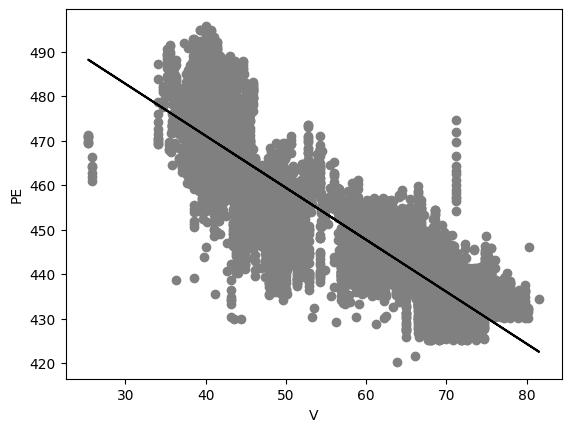

In [10]:
plt.scatter(df['V'], df['PE'], color = 'grey')
plt.ylabel('PE')
plt.xlabel('V')
plt.plot(df['V'], predictionV, color = 'black')

# Simple Linear Regression Model using AP

In [11]:
model = smf.ols('PE~AP', df)
linRegModelAP=model.fit()
predictionAP = linRegModelAP.predict(df)
linRegModelAP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:55   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

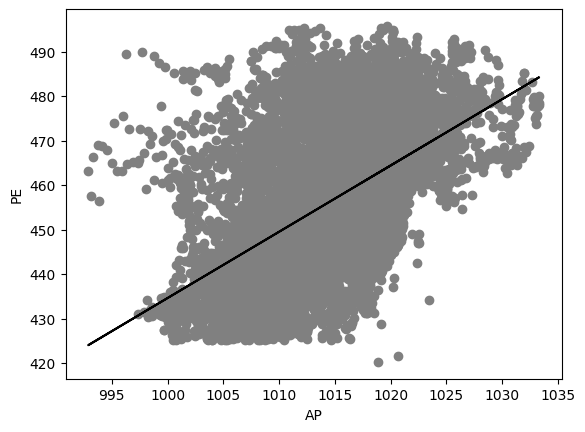

In [12]:
plt.scatter(df['AP'], df['PE'], color = 'grey')
plt.ylabel('PE')
plt.xlabel('AP')
plt.plot(df['AP'], predictionAP, color = 'black')

# Simple Linear Regression Model using RH

In [13]:
model = smf.ols('PE~RH', df)
linRegModelRH=model.fit()
predictionRH = linRegModelRH.predict(df)
linRegModelRH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:55   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

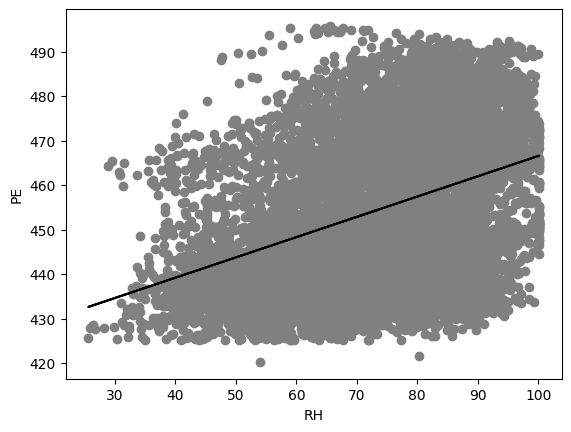

In [14]:
plt.scatter(df['RH'], df['PE'], color = 'grey')
plt.ylabel('PE')
plt.xlabel('RH')
plt.plot(df['RH'], predictionRH, color = 'black')

# From the above plots, we can see that the predictors have a relationship with the response. The p values for all the predictors are significantly less than threshold value which is 0.05. Hence, there is significant association between the dependent and independent variables.

# Outlier Analysis
# Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1)

In [15]:
lowerBoundAT = df1.loc['firstquartile', 'AT'] - ((df1.loc['interquartileRange', 'AT']) * 1.5)
upperBoundAT = df1.loc['thirdquartile', 'AT'] + ((df1.loc['interquartileRange', 'AT']) * 1.5)
print('The upper bound for AT is:', upperBoundAT, 'and the lower bound for AT is', lowerBoundAT)
print('The outliers for AT are as below:')
df[(df['AT'] < lowerBoundAT) | (df['AT'] > upperBoundAT)]

The upper bound for AT is: 44.035 and the lower bound for AT is -4.804999999999998
The outliers for AT are as below:


,AT,V,AP,RH,PE


In [16]:
lowerBoundV = df1.loc['firstquartile', 'V'] - ((df1.loc['interquartileRange', 'V']) * 1.5)
upperBoundV = df1.loc['thirdquartile', 'V'] + ((df1.loc['interquartileRange', 'V']) * 1.5)
print('The upper bound for V is:', upperBoundV, 'and the lower bound for V is', lowerBoundV)
print('The outliers for V are as below:')
df[(df['V'] < lowerBoundV) | (df['V'] > upperBoundV)]

The upper bound for V is: 103.74000000000001 and the lower bound for V is 4.539999999999999
The outliers for V are as below:


,AT,V,AP,RH,PE


In [17]:
lowerBoundAP = df1.loc['firstquartile', 'AP'] - ((df1.loc['interquartileRange', 'AP']) * 1.5)
upperBoundAP = df1.loc['thirdquartile', 'AP'] + ((df1.loc['interquartileRange', 'AP']) * 1.5)
print('The upper bound for AP is:', upperBoundAP, 'and the lower bound for AP is', lowerBoundAP)
print('The outliers for AP are as below:')
df[(df['AP'] < lowerBoundAP) | (df['AP'] > upperBoundAP)]

The upper bound for AP is: 1029.5 and the lower bound for AP is 996.8600000000001
The outliers for AP are as below:


,AT,V,AP,RH,PE
238,13.49,44.47,1030.46,69.49,466.66
319,9.25,41.82,1033.25,74.73,478.48
368,13.49,44.47,1030.18,69.15,468.46
536,9.11,40.02,1031.10,83.02,479.03
571,5.97,36.25,1029.65,86.74,487.03
...,...,...,...,...,...
9068,15.62,41.23,992.89,83.99,463.21
9159,7.20,40.02,1031.71,69.89,480.53
9267,12.51,41.92,1031.21,64.66,468.41
9342,8.72,40.02,1031.32,78.09,477.86


In [18]:
lowerBoundRH = df1.loc['firstquartile', 'RH'] - ((df1.loc['interquartileRange', 'RH']) * 1.5)
upperBoundRH = df1.loc['thirdquartile', 'RH'] + ((df1.loc['interquartileRange', 'RH']) * 1.5)
print('The upper bound for RH is:', upperBoundRH, 'and the lower bound for RH is', lowerBoundRH)
print('The outliers for RH are as below:')
df[(df['RH'] < lowerBoundRH) | (df['RH'] > upperBoundRH)]

The upper bound for RH is: 117.08375 and the lower bound for RH is 31.073750000000004
The outliers for RH are as below:


,AT,V,AP,RH,PE
789,34.30,74.67,1015.98,25.89,427.84
2262,33.94,74.67,1015.94,28.16,427.98
3603,19.78,44.71,1015.70,29.43,465.49
4367,34.65,74.67,1016.03,26.67,427.69
6472,33.83,67.90,1005.94,29.86,428.12
7983,19.31,44.71,1016.13,30.59,463.00
8061,34.24,74.67,1016.24,25.56,425.58
8737,18.76,44.71,1015.15,30.83,462.18
8751,19.32,44.71,1015.30,28.81,464.38
9015,35.01,74.67,1016.10,26.30,428.48


# From the above outlier analysis, we can see that there are some outliers for AP and RH. There are no outliers for AT and V. Removing these outliers will give us better results.

# (1) (d) Multiple Regression Model

In [19]:
model = smf.ols('PE~AT+V+AP+RH', df)
multipleLinRegModel=model.fit()
predictionMultiple = multipleLinRegModel.predict(df)
multipleLinRegModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:56   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We can reject the null hypothesis for every predictor as each of the predictors has a p value less than threshold value which is 0.05 and every variable has a significant co-efficient value which affects the regression value.

# (1) (e) Comparing simple linear regression model and multiple linear regression model results

Coefficient of AT in linear regression: -2.171319958517799 and in multiple regression: -1.977513106635399
Coefficient of V in linear regression: -1.1681351265557134 and in multiple regression: -0.23391642258249887
Coefficient of AP in linear regression: 1.4898716733991115 and in multiple regression: 0.062082943780857436
Coefficient of RH in linear regression: 0.45565010226298047 and in multiple regression: -0.1580541029164131


Text(0.5, 0, 'Simple/Univariate Regression Coefficients')

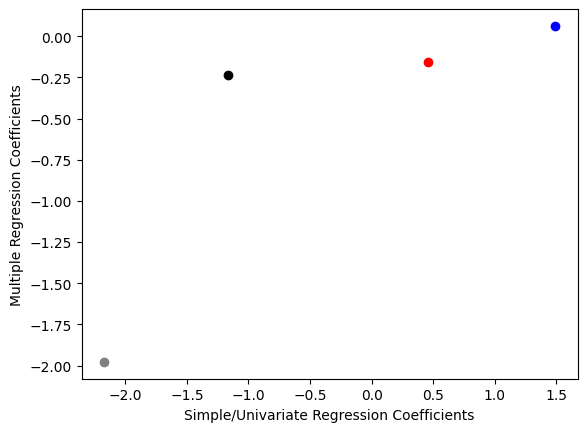

In [20]:
print('Coefficient of AT in linear regression:', linRegModelAT.params[1], 'and in multiple regression:', multipleLinRegModel.params[1])
print('Coefficient of V in linear regression:', linRegModelV.params[1], 'and in multiple regression:', multipleLinRegModel.params[2])
print('Coefficient of AP in linear regression:', linRegModelAP.params[1], 'and in multiple regression:', multipleLinRegModel.params[3])
print('Coefficient of RH in linear regression:', linRegModelRH.params[1], 'and in multiple regression:', multipleLinRegModel.params[4])

plt.scatter(linRegModelAT.params[1], multipleLinRegModel.params[1], color = 'grey')
plt.scatter(linRegModelV.params[1], multipleLinRegModel.params[2], color = 'black')
plt.scatter(linRegModelAP.params[1], multipleLinRegModel.params[3], color = 'blue')
plt.scatter(linRegModelRH.params[1], multipleLinRegModel.params[4], color = 'red')
plt.ylabel('Multiple Regression Coefficients')
plt.xlabel('Simple/Univariate Regression Coefficients')

# On comparing the results, we observe that the coefficients for the variables in multiple regression are less than the corresponding coefficients for the variables in simple linear regression.

# (1) (f) Finding Non Linear Association

# Non-linear association for AT

In [21]:
dataFrame1 = df['AT']
polyFeat = PolynomialFeatures(degree = 3)
dataFrame1 = pd.DataFrame(dataFrame1)
at = polyFeat.fit_transform(dataFrame1)
model = smf.ols('PE~at', df)
linRegModelAT=model.fit()
predictionsAT = linRegModelAT.predict(df)
linRegModelAT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:56   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.3641      0.336    732.248      0.000     245.705     247.024
at[0]        246.3641      0.336    732.248      0.000     245.705     247.024
at[1]         -0.6103      0.124     -4.941      0.000      -0.852      -0.368
at[2]         -0.1251      0.007    -18.199      0.000      -0.139      -0.112
at[3]          0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.15e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Values for PE')

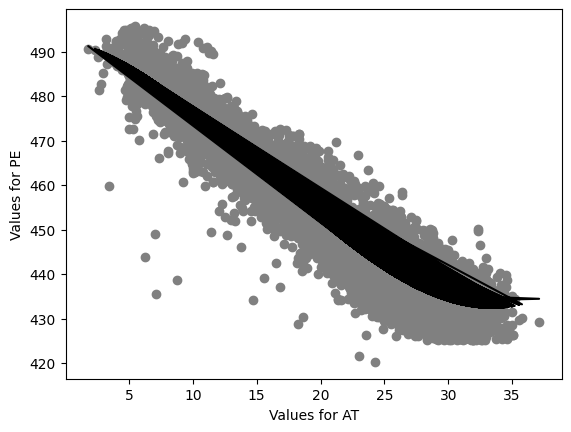

In [22]:
plt.scatter(df['AT'], df['PE'],color='grey')
plt.plot(df['AT'], predictionsAT, color = 'black')
plt.xlabel('Values for AT')
plt.ylabel('Values for PE')

# Non-linear association for V

In [23]:
dataFrame1 = df['V']
polyFeat = PolynomialFeatures(degree = 3)
dataFrame1 = pd.DataFrame(dataFrame1)
v = polyFeat.fit_transform(dataFrame1)
model = smf.ols('PE~v', df)
linRegModelV=model.fit()
predictionsV = linRegModelV.predict(df)
linRegModelV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:57   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    277.0734      4.575     60.557      0.000     268.105     286.042
v[0]         277.0734      4.575     60.557      0.000     268.105     286.042
v[1]          -2.1444      0.509     -4.214      0.000      -3.142      -1.147
v[2]          -0.0027      0.009     -0.294      0.768      -0.021       0.015
v[3]           0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     1.45e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Values for PE')

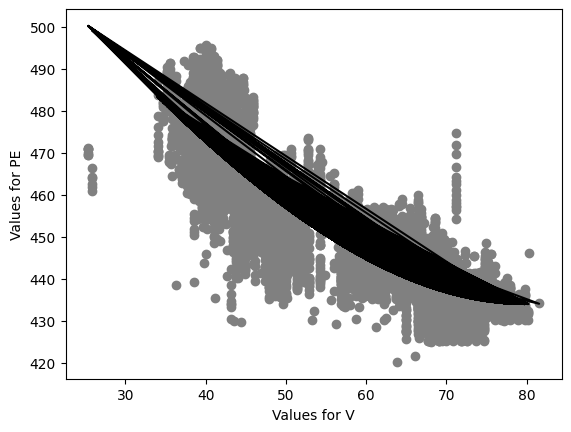

In [24]:
plt.scatter(df['V'], df['PE'],color='grey')
plt.plot(df['V'], predictionsV, color = 'black')
plt.xlabel('Values for V')
plt.ylabel('Values for PE')

# Non-linear association for AP

In [25]:
dataFrame1 = df['AP']
polyFeat = PolynomialFeatures(degree = 3)
dataFrame1 = pd.DataFrame(dataFrame1)
ap = polyFeat.fit_transform(dataFrame1)
model = smf.ols('PE~ap', df)
linRegModelAP=model.fit()
predictionsAP = linRegModelAP.predict(df)
linRegModelAP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:57   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
ap[0]          0.0747      0.009      8.415      0.000       0.057       0.092
ap[1]         25.2554      3.001      8.415      0.000      19.372      31.139
ap[2]         -0.0500      0.006     -8.439      0.000      -0.062      -0.038
ap[3]       2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     3.10e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Values for PE')

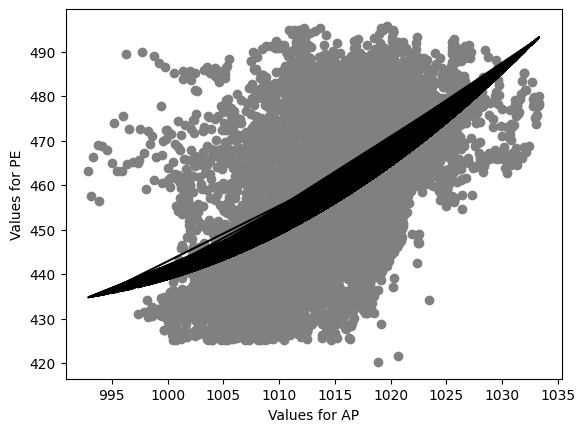

In [26]:
plt.scatter(df['AP'], df['PE'],color='grey')
plt.plot(df['AP'], predictionsAP, color = 'black')
plt.xlabel('Values for AP')
plt.ylabel('Values for PE')

# Non-linear association for RH

In [27]:
dataFrame1 = df['RH']
polyFeat = PolynomialFeatures(degree = 3)
dataFrame1 = pd.DataFrame(dataFrame1)
rh = polyFeat.fit_transform(dataFrame1)
model = smf.ols('PE~rh', df)
linRegModelRH=model.fit()
predictionsRH = linRegModelRH.predict(df)
linRegModelRH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:58   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    234.2068      5.272     44.422      0.000     223.872     244.542
rh[0]        234.2068      5.272     44.422      0.000     223.872     244.542
rh[1]         -1.7292      0.486     -3.557      0.000      -2.682      -0.776
rh[2]          0.0321      0.007      4.433      0.000       0.018       0.046
rh[3]         -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     4.65e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Values for PE')

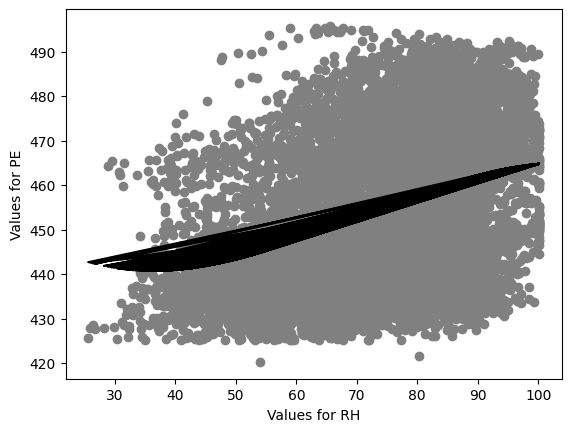

In [28]:
plt.scatter(df['RH'], df['PE'],color='grey')
plt.plot(df['RH'], predictionsRH, color = 'black')
plt.xlabel('Values for RH')
plt.ylabel('Values for PE')

# From the scatterplots above and the summary we can see that there is non-linear association of variables AT, AP and RH with PE as the p value is less than threshold(0.05). However, for V the p-value for v**2 is 0.768 which is higher than threshold(0.05) value, so there is no significant association between V and PE.

# (1) (g) Pairwise Interaction

In [29]:
model = smf.ols('PE~AT + V + AP + RH + (AT * RH) + (AT * AP) + (AT * V) + (V * AP) + (V * RH) + (AP * RH)', df)
linRegModelPairs=model.fit()
predictionsPairs = linRegModelPairs.predict(df)
linRegModelPairs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:58   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We can see that the p values of the interactions (AT & RH), (AT & V), (V & AP) and (AP & RH) is below the threshold value of 0.05. Hence, we can say that there is association between some of the interactions of predictors with the response.

# (1) (h) Improving regression model 

# Complete regression model 

In [30]:
trainingData, testingData = train_test_split(df, train_size = 0.7, random_state = 16)
trainingDataX, testingDataX, trainingDataY, testingDataY = train_test_split(df.loc[:,'AT':'RH'], df['PE'], train_size = 0.7, random_state = 16)
model = smf.ols('PE ~ AT + V + AP + RH', trainingData)
linRegModel=model.fit()
predictions = linRegModel.predict(trainingDataX)
print('Training Mean Squared Error:', mean_squared_error(trainingDataY, predictions))

predictions = linRegModel.predict(testingDataX)
print('Testing Mean Squared Error:', mean_squared_error(testingDataY, predictions))

linRegModel.summary()

Training Mean Squared Error: 20.709694192736414
Testing Mean Squared Error: 20.925242451748257


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.187e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:58   Log-Likelihood:                -19651.
No. Observations:                6697   AIC:                         3.931e+04
Df Residuals:                    6692   BIC:                         3.935e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    460.8487     11.676     39.468      0.000     437.959     483.738
AT            -1.9690      0.018   -108.191      0.000      -2.005      -1.933
V             -0.2338      0.009    -26.882      0.000      -0.251      -0.217
AP             0.0555      0.011      4.902      0.000       0.033       0.078
RH            -0.1553      0.005    -31.268      0.000      -0.165      -0.146
==============================================================================
Omnibus:                      788.378   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4193.195
Skew:                          -0.442   Prob(JB):                         0.00
Kurtosis:                       6.774   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression model with all possible interactions and quadratic nonlinearities

In [31]:
trainingData, testingData = train_test_split(df, train_size = 0.7, random_state = 16)
model = smf.ols('PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + (AT * V) + (AT * AP) + (AT * RH) + (V * AP) + (V * RH) + (AP * RH) + (AT * V * AP) + (AT * V * RH) + (AT * AP * RH) + (V * AP * RH) ', trainingData)
linearModel=model.fit()
predictions = linearModel.predict(trainingData)
print('Training Mean Squared Error:', mean_squared_error(trainingDataY, predictions))

predictions = linearModel.predict(testingData)
print('Testing Mean Squared Error:', mean_squared_error(testingDataY, predictions))

linearModel.summary()

Training Mean Squared Error: 17.77758764068432
Testing Mean Squared Error: 17.743360480205084


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     5710.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:58   Log-Likelihood:                -19139.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6678   BIC:                         3.845e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6567.7037   1487.050     -4.417      0.000   -9482.796   -3652.611
AT           -99.6030     15.453     -6.446      0.000    -129.896     -69.310
V            -41.5694     10.438     -3.983      0.000     -62.031     -21.108
AP            15.5691      2.846      5.470      0.000       9.989      21.149
RH             2.6484      4.054      0.653      0.514      -5.299      10.596
I(AT ** 2)     0.0179      0.004      4.878      0.000       0.011       0.025
I(V ** 2)     -0.0003      0.001     -0.358      0.721      -0.002       0.002
I(AP ** 2)    -0.0085      0.001     -6.104      0.000      -0.011      -0.006
I(RH ** 2)    -0.0018      0.000     -5.468      0.000      -0.002      -0.001
AT:V           1.7098      0.163     10.465      0.000       1.390       2.030
AT:AP          0.0959      0.015      6.295      0.000       0.066       0.126
AT:RH          0.2369      0.168      1.408      0.159      -0.093       0.567
V:AP           0.0406      0.010      3.942      0.000       0.020       0.061
V:RH          -0.0174      0.115     -0.151      0.880      -0.243       0.208
AP:RH         -0.0023      0.004     -0.589      0.556      -0.010       0.005
AT:V:AP       -0.0017      0.000    -10.445      0.000      -0.002      -0.001
AT:V:RH     2.624e-05   5.74e-05      0.457      0.647   -8.62e-05       0.000
AT:AP:RH      -0.0002      0.000     -1.453      0.146      -0.001    8.42e-05
V:AP:RH     1.694e-05      0.000      0.149      0.882      -0.000       0.000
==============================================================================
Omnibus:                     1486.595   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13490.160
Skew:                          -0.803   Prob(JB):                         0.00
Kurtosis:                       9.765   Cond. No.                     1.34e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Using the summary above, we can remove the terms whose p value is greater than the threshold value 0.05 as those terms would not be significant for the model. Hence, we will remove RH , V**2 , AT:RH, AP:RH , V:RH , AT:V:RH , AT:AP:RH , V:AP:RH.

model = smf.ols('PE ~ AT + V + AP + I(AT**2) + I(AP**2) + I(RH**2) + (AT * V) + (AT * AP) + (V * AP) + (AT * V * AP)', trainingData)
linearModel2=model.fit()
predictions = linearModel2.predict(trainingData)
print('Training Mean Squared Error:', mean_squared_error(trainingDataY, predictions))

predictions = linearModel2.predict(testingData)
print('Testing Mean Squared Error:', mean_squared_error(testingDataY, predictions))

linearModel2.summary()

# (1) (i) KNN Regression

# KNN without Normalizing Data

In [32]:

trainingDataX, testingDataX, trainingDataY, testingDataY = train_test_split(df.loc[:, 'AT':'RH'], df['PE'], train_size = 0.7, random_state = 16)

testList = []
trainList = []
minK, minError = None, 1000000
for k in range(1, 101):
    knnModel = KNeighborsRegressor(n_neighbors = k)
    knnModel.fit(trainingDataX, trainingDataY)
    
    predictions = knnModel.predict(testingDataX)
    error = mean_squared_error(testingDataY, predictions)
    if error < minError:
        minK = k
        minError = error
    testList.append(error)
    
    predictions = knnModel.predict(trainingDataX)
    error = mean_squared_error(trainingDataY, predictions)

    trainList.append(error)

kList = []
for i in range(1, 101):
    kList.append(1 / i)

print("Using KNN the best k is", minK, "and the MSE is", minError)

Using KNN the best k is 6 and the MSE is 16.313661764193665


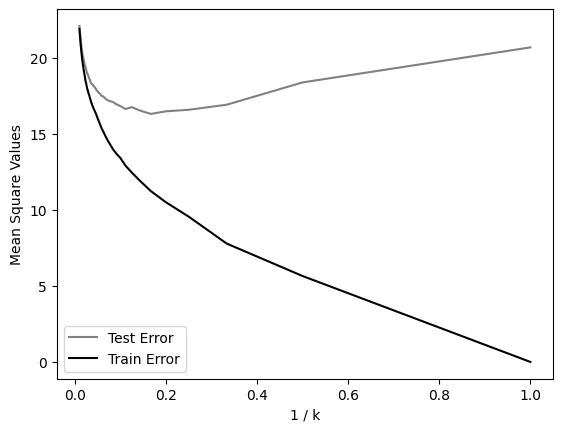

In [33]:
plt.plot(kList, testList, label = 'Test Error' , color = 'grey')
plt.plot(kList, trainList, label = 'Train Error' , color = 'black')
plt.ylabel('Mean Square Values')
plt.xlabel('1 / k')
plt.legend()

# KNN After normalizing the data

In [34]:
scaler = StandardScaler()
trainingDataXScaled = scaler.fit_transform(trainingDataX)
testingDataXScaled = scaler.fit_transform(testingDataX)
trainingDataX = pd.DataFrame(trainingDataXScaled)
testingDataX = pd.DataFrame(testingDataXScaled)

testList = []
trainList = []
minK, minError = None, 1000000
for k in range(1, 101):
    knnModel = KNeighborsRegressor(n_neighbors = k)
    knnModel.fit(trainingDataX, trainingDataY)
    
    predictions = knnModel.predict(testingDataX)
    error = mean_squared_error(testingDataY, predictions)
    if error < minError:
        minK = k
        minError = error
    testList.append(error)
    
    predictions = knnModel.predict(trainingDataX)
    error = mean_squared_error(trainingDataY, predictions)

    trainList.append(error)

kList = []
for i in range(1, 101):
    kList.append(1 / i)

print("Using KNN the best k is", minK, "and the MSE is", minError)

Using KNN the best k is 5 and the MSE is 14.786204622779518


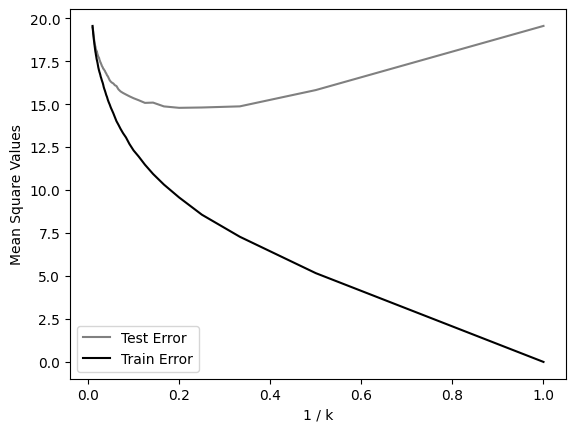

In [35]:
plt.plot(kList, testList, label = 'Test Error' , color = 'grey')
plt.plot(kList, trainList, label = 'Train Error' , color = 'black')
plt.ylabel('Mean Square Values')
plt.xlabel('1 / k')
plt.legend()

# (1) (j) Summerizing results of all the models

In [36]:
header = ["Model Type", "Test MSE"]
table = [["Complete Regression Model('AT', 'V', 'AP', 'RH')", 20.925242451748257],["Regression Model(Before removing features)", 17.743360480205084] , ["Regression Model(After removing features)", 17.80877502636172], ["KNN without normalization", 16.313661764193665], ["KNN with normalization", 14.786204622779518]]
print(tabulate(table, headers = header, tablefmt = 'fancy_grid'))


╒══════════════════════════════════════════════════╤════════════╕
│ Model Type                                       │   Test MSE │
╞══════════════════════════════════════════════════╪════════════╡
│ Complete Regression Model('AT', 'V', 'AP', 'RH') │    20.9252 │
├──────────────────────────────────────────────────┼────────────┤
│ Regression Model(Before removing features)       │    17.7434 │
├──────────────────────────────────────────────────┼────────────┤
│ Regression Model(After removing features)        │    17.8088 │
├──────────────────────────────────────────────────┼────────────┤
│ KNN without normalization                        │    16.3137 │
├──────────────────────────────────────────────────┼────────────┤
│ KNN with normalization                           │    14.7862 │
╘══════════════════════════════════════════════════╧════════════╛


# From the table above, we can see that KNN model with normalization performs better than all the other models, it has the least test mean squared error.

# 2. ISLR: 2.4.1

# 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

# (a) The sample size n is extremely large, and the number of predic- tors p is small.

Having a large sample size provides a lot of information about the underlying patterns in the data. Flexible methods can take advantage of this large sample size to fit complex models as they are less likely to overfit because there is large data to estimate the model parameters accurately. Therefore, flexible methods are generally expected to perform better than inflexible methods.

# (b) The number of predictors p is extremely large, and the number of observations n is small.

When having many predictors and a small sample size, there is a risk of overfitting with flexible models, as they may capture noise instead of meaningful patterns. In such situations, inflexible methods can be more suitable because they constrain the model complexity. So, inflexible methods are generally expected to perform better in this scenario.

# (c) The relationship between the predictors and response is highly non-linear.

When the relationship between predictors and the response variable is highly non-linear, flexible methods that can capture complex patterns are generally expected to perform better. Inflexible methods like linear regression may struggle to capture non-linearities.

# (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

In situations with high error variance, flexible methods can fit the training data very closely, capturing both the signal and the noise in the data. This can lead to overfitting, where the model does not generalize well to new, unseen data. In such cases, inflexible methods, which are less sensitive to noise and have more stable predictions, may perform better.

# 2. ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

 Obs.   X1   X2   X3     Y
  1     0    3    0    Red
  2     2    0    0    Red
  3     0    1    3    Red
  4     0    1    2   Green 
  5    −1    0    1   Green 
  6     1    1    1    Red
  
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

# a) Compute the Euclidean distance between each observation and the test point,X1 =X2 =X3 =0.

Test point = (0,0,0)

For observation 1: (0,3,0)
Euclidean Distance = sqrt( 0^2 + 3^2 + 0^2 ) = 3

For observation 2: (2,0,0)
Euclidean Distance = sqrt( 2^2 + 0^2 + 0^2 ) = 2

For observation 3: (0,1,3)
Euclidean Distance = sqrt( 0^2 + 1^2 + 3^2 ) = 3.16

For observation 4: (0,1,2)
Euclidean Distance = sqrt( 0^2 + 1^2 + 2^2 ) = 2.23

For observation 5: (-1,0,1)
Euclidean Distance = sqrt( (-1)^2 + 0^2 + 1^2 ) = 1.41

For observation 6: (1,1,1)
Euclidean Distance = sqrt( 1^2 + 1^2 + 1^2 ) = 1.73

# (b) What is our prediction with K = 1? Why?

When K=1, the model will look at the point that is nearest to the test point. According to the above Euclidean distances, the nearest point is observation 5. Hence our model will predict the class of observation 5 ie. green

# (c) What is our prediction with K = 3? Why?

When K=3, the model will look at the 3 points that is nearest to the test point. According to the above Euclidean distances, the 3 nearest point are observation 5,6 and 2. The classes of these points are green, red and red respectively. Hence by majority our model will predict the class of the test point as red.

# (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

The Bayes decision boundry is inversly propostional to K. If K increases, then the boundary becomes more rigid. Hence the value of K must be small for a good non - linear bayes decision boundary.